In [49]:
%matplotlib notebook

# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# Save file path to variable
metrotransit_csv = "TransitStopsBoardingsAndAlightings2019.csv"

# Read with Pandas
metrotransit_df = pd.read_csv(metrotransit_csv)
metrotransit_df.head(60)

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
0,Metro Transit,Urban Local,Core Local,2,East,51581.0,HENNEPIN AVE & FRANKLIN AVE / 22ND ST,NaN,44.961886,-93.292079,...,MINNEAPOLIS,92.0,92.0,Weekday,75,8.0,1.0,100%,N,NaN
1,Metro Transit,Urban Local,Core Local,2,East,1099.0,HENNEPIN AVE S & 22ND ST W,NaN,44.961030,-93.292777,...,MINNEAPOLIS,92.0,92.0,Weekday,33,2.0,2.0,100%,N,NaN
2,Metro Transit,Urban Local,Core Local,2,East,13340.0,DUPONT AVE & FRANKLIN AVE W,NaN,44.962534,-93.293016,...,MINNEAPOLIS,92.0,92.0,Weekday,17,1.0,3.0,100%,N,NaN
3,Metro Transit,Urban Local,Core Local,2,East,13337.0,FRANKLIN AVE W & HENNEPIN AVE S,NaN,44.962630,-93.291123,...,MINNEAPOLIS,92.0,92.0,Weekday,177,2.0,4.0,100%,N,NaN
4,Metro Transit,Urban Local,Core Local,2,East,56705.0,FRANKLIN AVE W & LYNDALE AVE S,NaN,44.962642,-93.287697,...,MINNEAPOLIS,92.0,92.0,Weekday,143,4.0,5.0,100%,N,NaN
5,Metro Transit,Urban Local,Core Local,2,East,13330.0,FRANKLIN AVE W & PLEASANT AVE,NaN,44.962635,-93.283040,...,MINNEAPOLIS,92.0,92.0,Weekday,66,8.0,6.0,100%,N,NaN
6,Metro Transit,Urban Local,Core Local,2,East,56697.0,FRANKLIN AVE E & NICOLLET AVE,NaN,44.962615,-93.277632,...,MINNEAPOLIS,92.0,92.0,Weekday,586,72.0,7.0,100%,N,NaN
7,Metro Transit,Urban Local,Core Local,2,East,13320.0,FRANKLIN AVE E & 3RD AVE S,NaN,44.962623,-93.273016,...,MINNEAPOLIS,92.0,92.0,Weekday,249,62.0,8.0,100%,N,NaN
8,Metro Transit,Urban Local,Core Local,2,East,13316.0,FRANKLIN AVE E & PORTLAND AVE,NaN,44.962627,-93.267015,...,MINNEAPOLIS,92.0,92.0,Weekday,131,148.0,9.0,100%,N,NaN
9,Metro Transit,Urban Local,Core Local,2,East,13312.0,FRANKLIN AVE E & CHICAGO AVE,NaN,44.962615,-93.262737,...,MINNEAPOLIS,92.0,92.0,Weekday,210,230.0,10.0,100%,N,NaN


In [2]:
Route_df = metrotransit_df.groupby("Route Type")
Route_df.count()

,Provider,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,x-coordinate,...,City,Trips,Obs Trips,Schedule,Ons,Offs,Seq,%Sampled,Downtown,Comment
Route Type,,,,,,,,,,,,,,,,,,,,,
Express,7546,7546,7546,7532,7546,7546,93,7546,7546,7546,...,7546,7546,5795,7546,5809,5795,7546,6698,7546,38
Suburban Local,8321,8321,8321,8321,8321,8321,228,8321,8321,8321,...,8321,8321,6373,8321,6373,6373,8321,8279,8321,71
Urban Local,23252,23252,23252,23126,23252,23252,348,23252,23252,23252,...,23252,23252,23093,23252,23093,22967,23252,23252,23252,292


In [3]:
schedule_df = metrotransit_df.groupby("Schedule")
schedule_df.count()

,Provider,Route Type,Route Classification,Route,Dir,Site_id,Geo_Node_Name,Group ID,latitude,longitude,...,y-coordinate,City,Trips,Obs Trips,Ons,Offs,Seq,%Sampled,Downtown,Comment
Schedule,,,,,,,,,,,,,,,,,,,,,
Saturday,9313,9313,9313,9313,9271,9313,9313,175,9313,9313,...,9313,9313,9313,8923,8923,8881,9313,9313,9313,100
Sunday,7496,7496,7496,7496,7454,7496,7496,152,7496,7496,...,7496,7496,7496,7106,7106,7064,7496,7496,7496,73
Weekday,22303,22303,22303,22303,22254,22303,22303,341,22303,22303,...,22303,22303,22303,19232,19239,19190,22303,21413,22303,228
Weekend,7,7,7,7,0,7,7,1,7,7,...,7,7,7,0,7,0,7,7,7,0


In [4]:
core_local_df=metrotransit_df.loc[metrotransit_df["Route Classification"]=="Core Local"]
print(len(core_local_df["Site_id"].unique()))

5991


<IPython.core.display.Javascript object>


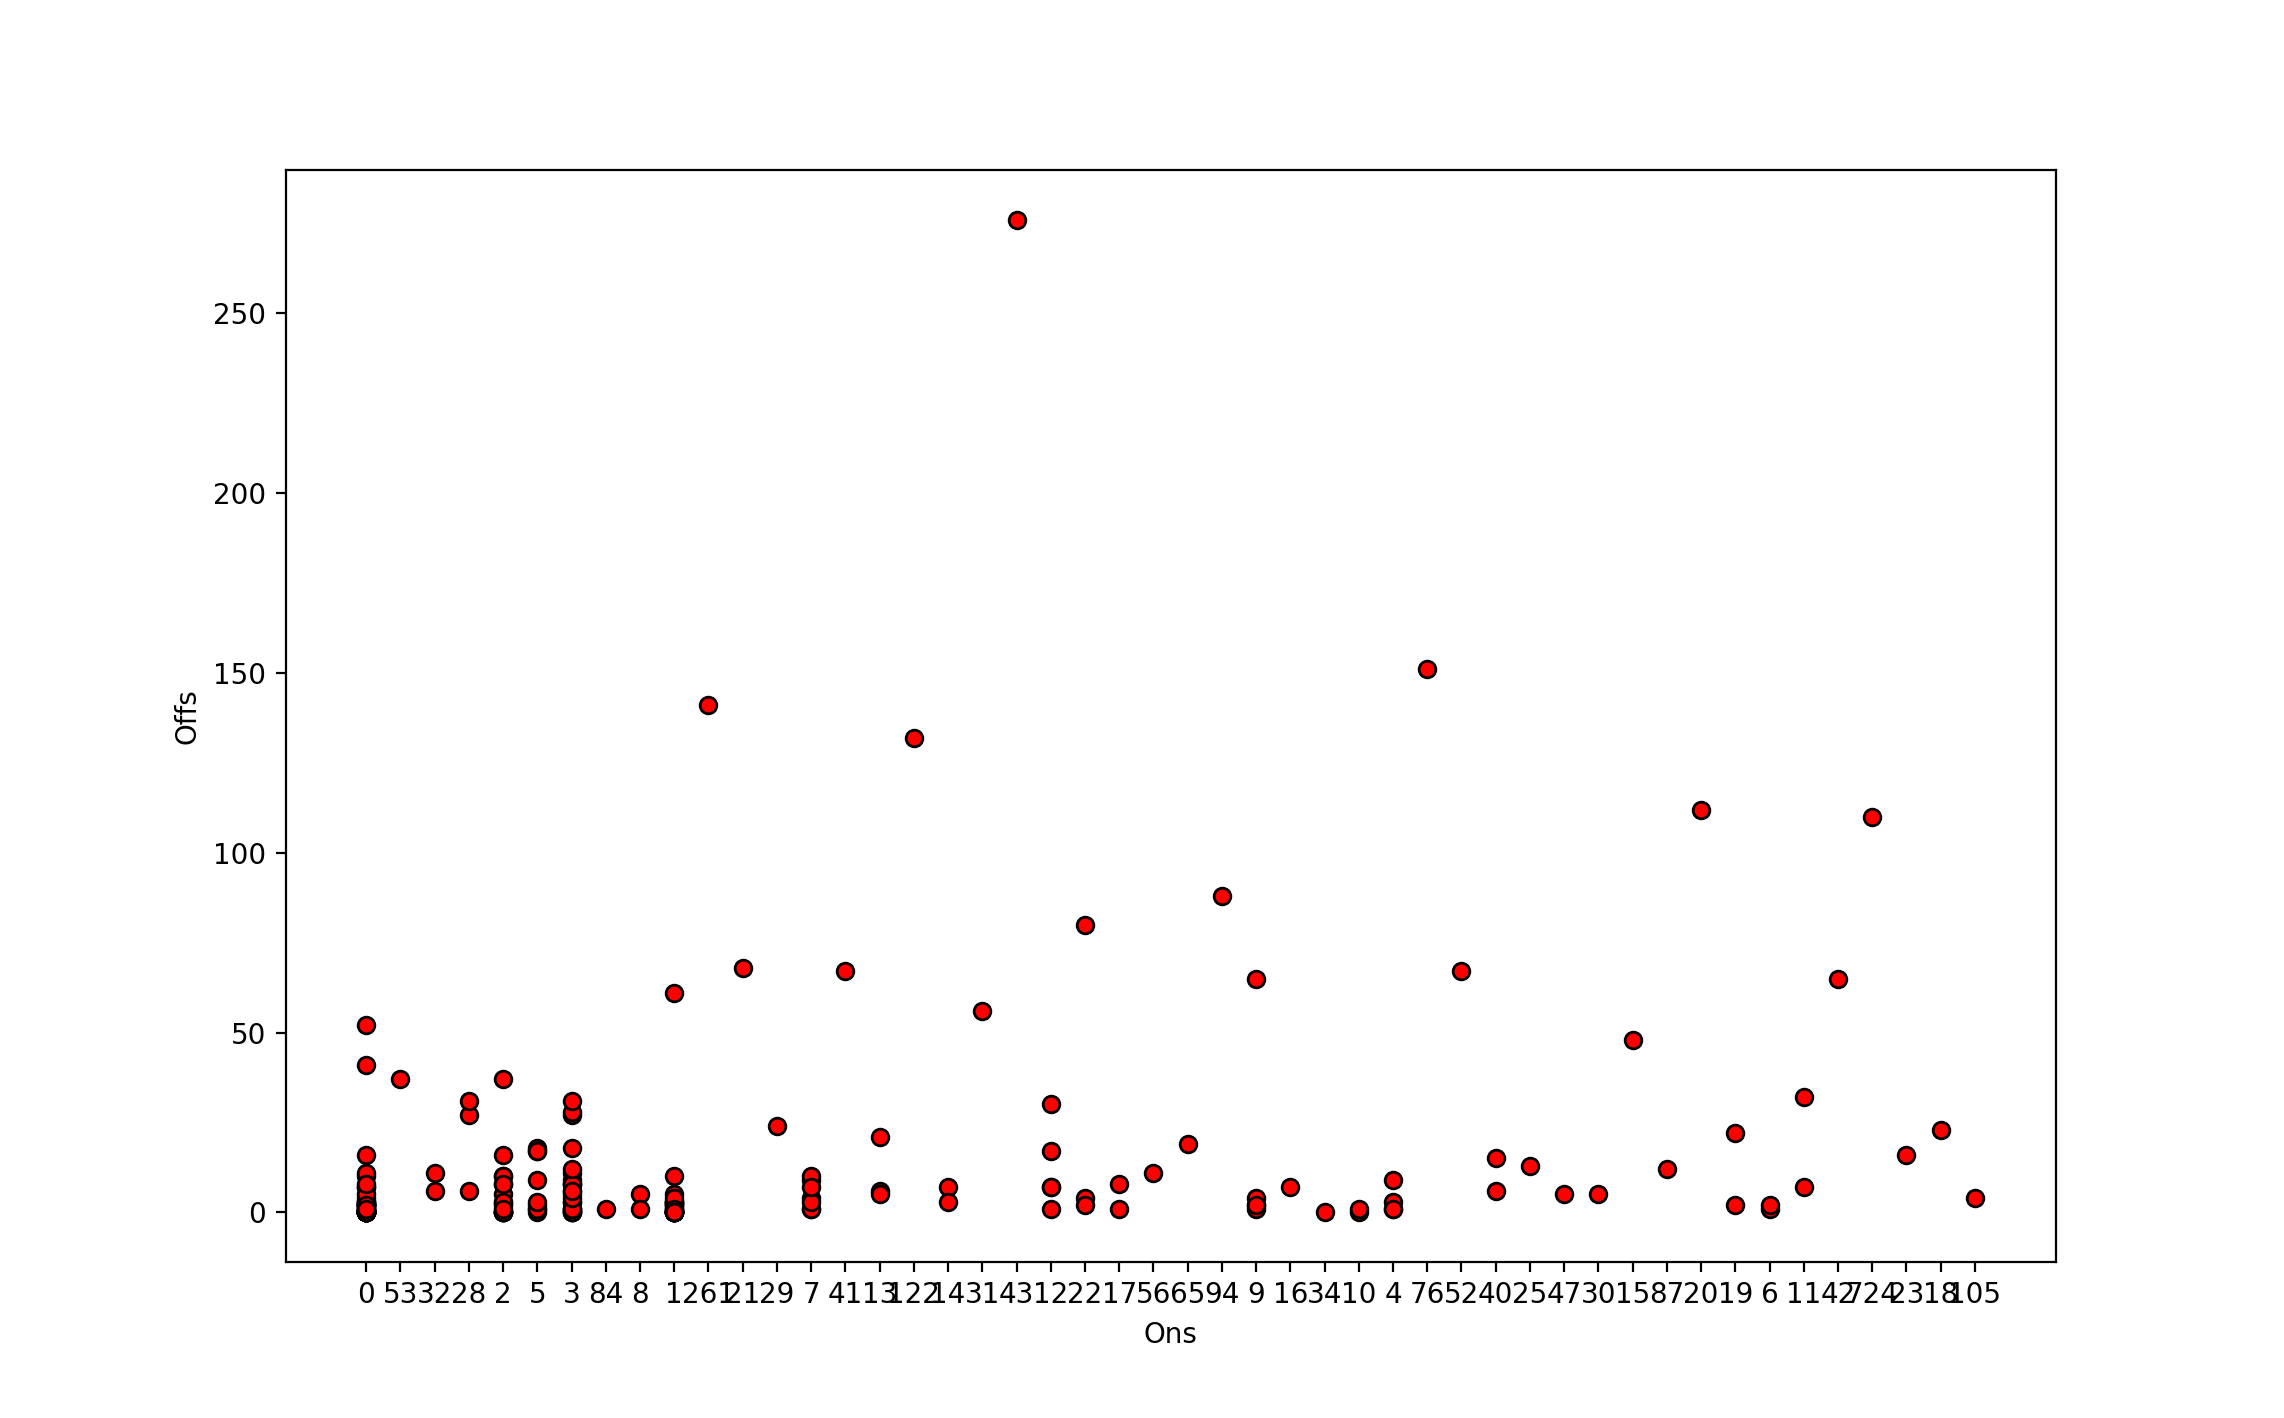

Text(0, 0.5, 'Offs')

In [12]:
sample_core_local_df = core_local_df.sample(n = 200)

ons = sample_core_local_df["Ons"]
offs = sample_core_local_df["Offs"]

# # The maximum x value for our chart will be 100
# x_limit = 50

# # List of values from 0 to 50 each value being 1 greater than the last
# x_axis = np.arange(int(core_local_df["Ons"].min()), x_limit, int(core_local_df["Ons"].max())

# # Create a random array of data that we will use for our y values
# data = [random.random() for value in x_axis]


plt.scatter(ons, offs, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Ons")
plt.ylabel("Offs")


                                         Geo_Node_Name   Ons   Offs
22223                           7TH & NICOLLET STATION  1061  124.0
83                            PLEASANT ST & JONES HALL   938  108.0
3167                          NICOLLET MALL & 7TH ST S   898  107.0
6189                             5TH ST & MINNESOTA ST   750   34.0
31543                           7TH & NICOLLET STATION   731   73.0
1775                          NICOLLET MALL & 5TH ST S   724  110.0
1175                          NICOLLET MALL & 7TH ST S   718  172.0
22161                           46TH ST STATION GATE A   697    6.0
22181                  ROSEDALE TRANSIT CENTER  GATE A   693    4.0
31501                  ROSEDALE TRANSIT CENTER  GATE A   680    4.0
5187                        MOA TRANSIT STATION GATE B   678   14.0
22173                    SNELLING & UNIVERSITY STATION   668  525.0
782    CHICAGO AVE S & CHICAGO LAKE TRANSIT CTR GATE C   668  282.0
26651                       MOA TRANSIT STATION 

<IPython.core.display.Javascript object>


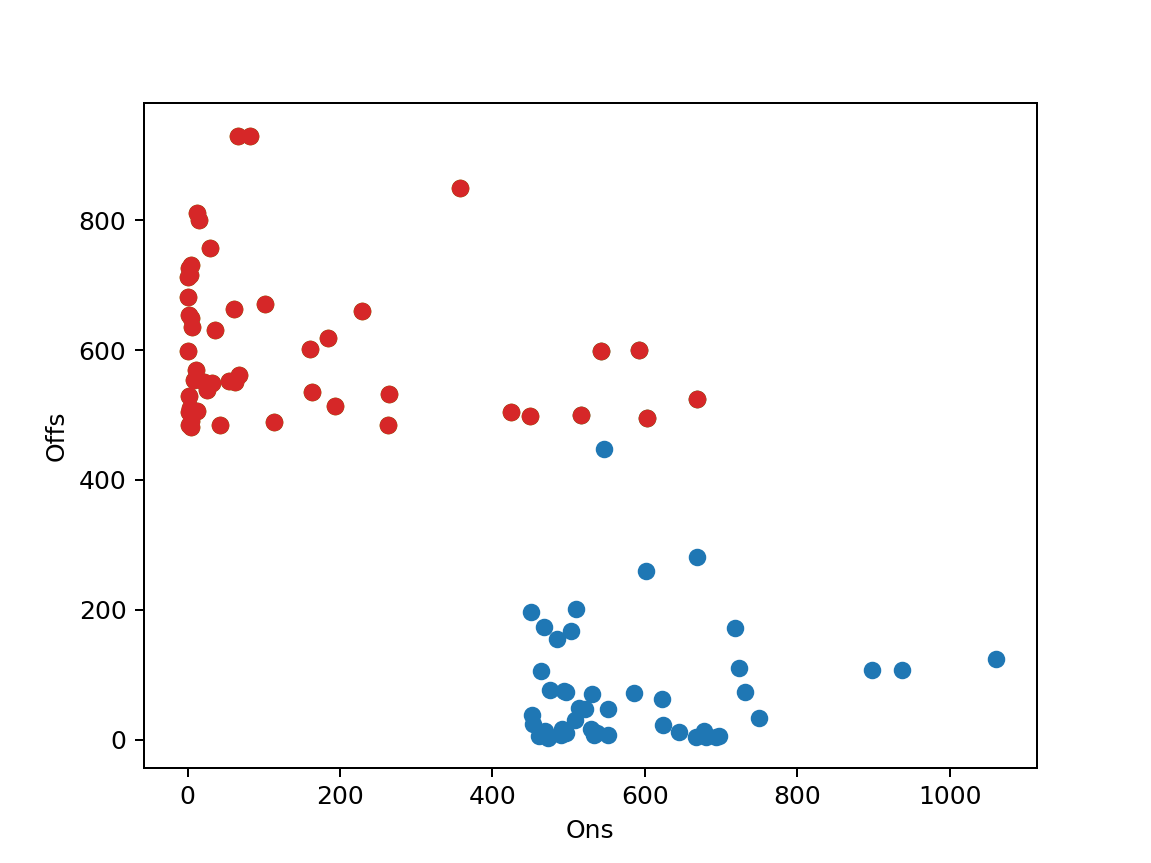

In [70]:
df_station_on=pd.DataFrame(metrotransit_df,columns=["Geo_Node_Name","Ons","Offs"])
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind'quicksort', na_position='last')
#print(df_station_on.head(20))
df_station_on=df_station_on.dropna()
df_station_on["Ons"]=df_station_on["Ons"].str.replace(',', '')
df_station_on["Ons"]=df_station_on["Ons"].astype(int)
#print(df_station_on.head(50))
df_station_max=df_station_on["Ons"].max()
#print(df_station_max)
df_station_on=df_station_on.sort_values(by="Ons",ascending=False)
df_station_on=df_station_on.head(50)
print(df_station_on)
plt.scatter(df_station_on["Ons"],df_station_on["Offs"])

In [73]:
df_station_on=pd.DataFrame(metrotransit_df,columns=["Geo_Node_Name","Ons","Offs"])
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind'quicksort', na_position='last')
#print(df_station_on.head(20))
df_station_on=df_station_on.dropna()
df_station_on["Ons"]=df_station_on["Ons"].str.replace(',', '')
df_station_on["Ons"]=df_station_on["Ons"].astype(int)
#print(df_station_on.head(20))
#df_station_max=df_station_on["Ons"].max()
#print(df_station_max)
df_station_off=df_station_on.sort_values(by="Offs",ascending=False)
df_station_off=df_station_off.head(50)
print(df_station_off)
plt.scatter(df_station_off["Ons"],df_station_off["Offs"])
plt.xlabel("Ons")
plt.ylabel("Offs")

                                  Geo_Node_Name  Ons   Offs
3157                   NICOLLET MALL & 7TH ST S   82  930.0
22257                  6TH ST S & NICOLLET MALL   66  930.0
929        CHICAGO LAKE TRANSIT CENTER & GATE A  357  850.0
20170         MAPLE GROVE P&R & TRANSIT STATION   12  812.0
21546                FOLEY P&R & EVERGREEN BLVD   15  800.0
3158                   NICOLLET MALL & 5TH ST S   29  758.0
5283                 MOA TRANSIT STATION GATE B    5  731.0
22239           BROOKLYN CTR TRANSIT CTR GATE I    2  726.0
26747                MOA TRANSIT STATION GATE B    3  715.0
22180           ROSEDALE TRANSIT CENTER  GATE A    0  712.0
31500           ROSEDALE TRANSIT CENTER  GATE A    1  682.0
1133                   NICOLLET MALL & 7TH ST S  101  671.0
315              PLEASANT ST SE & SCHOLARS WALK   61  664.0
3182                  BLAISDELL AVE S & LAKE ST  229  661.0
22200                    46TH ST STATION GATE A    2  654.0
19599       HWY 610 NOBLE PKWY P&R & 95T

Text(68.74999691380394, 0.5, 'Offs')